In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
activities_data=pd.read_csv('act_train.csv')
people_data=pd.read_csv('people.csv')

In [3]:
activities_data.columns

Index(['people_id', 'activity_id', 'date', 'activity_category', 'char_1',
       'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
       'char_9', 'char_10', 'outcome'],
      dtype='object')

In [4]:
people_data.columns

Index(['people_id', 'char_1', 'group_1', 'char_2', 'date', 'char_3', 'char_4',
       'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 'char_10', 'char_11',
       'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17',
       'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 'char_23',
       'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 'char_29',
       'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35',
       'char_36', 'char_37', 'char_38'],
      dtype='object')

In [7]:
main_data=activities_data.merge(people_data,on='people_id')

#### Modify columns of dataframe for easier processing
#### NaN to replace -1 

In [8]:
main_data['activity_category']=[int(i.split(' ')[1]) if type(i)==str else -1 for i in main_data['activity_category']]
main_data['group_1']=[int(i.split(' ')[1]) if type(i)==str else -1 for i in main_data['group_1']]
for i in main_data.columns:
    if i.startswith('char'):
        main_data[i]=[int(i.split(' ')[1])  if type(i)==str else -1 for i in main_data[i]]

In [9]:
main_data.head(5)

,people_id,activity_id,date_x,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,act2_1734928,2023-08-26,4,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,ppl_100,act2_2434093,2022-09-27,2,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,ppl_100,act2_3404049,2022-09-27,2,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,ppl_100,act2_3651215,2023-08-04,2,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,ppl_100,act2_4109017,2023-08-26,2,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [11]:
main_data.columns

Index(['people_id', 'activity_id', 'date_x', 'activity_category', 'char_1_x',
       'char_2_x', 'char_3_x', 'char_4_x', 'char_5_x', 'char_6_x', 'char_7_x',
       'char_8_x', 'char_9_x', 'char_10_x', 'outcome', 'char_1_y', 'group_1',
       'char_2_y', 'date_y', 'char_3_y', 'char_4_y', 'char_5_y', 'char_6_y',
       'char_7_y', 'char_8_y', 'char_9_y', 'char_10_y', 'char_11', 'char_12',
       'char_13', 'char_14', 'char_15', 'char_16', 'char_17', 'char_18',
       'char_19', 'char_20', 'char_21', 'char_22', 'char_23', 'char_24',
       'char_25', 'char_26', 'char_27', 'char_28', 'char_29', 'char_30',
       'char_31', 'char_32', 'char_33', 'char_34', 'char_35', 'char_36',
       'char_37', 'char_38'],
      dtype='object')

In [10]:
main_data.activity_category.value_counts()

2    904683
5    490710
3    429408
4    207465
1    157615
6      4253
7      3157
Name: activity_category, dtype: int64

In [12]:
print(main_data.date_x.min())
print(main_data.date_x.max())
print(main_data.date_y.min())
print(main_data.date_y.max())

2022-07-17
2023-08-31
2020-05-18
2023-08-31


In [13]:
main_data.outcome.unique()

array([0, 1], dtype=int64)

'X = plt.gca().xaxis\nX.set_major_locator(locator)\n# Specify formatter\nX.set_major_formatter(fmt)\nplt.show()'

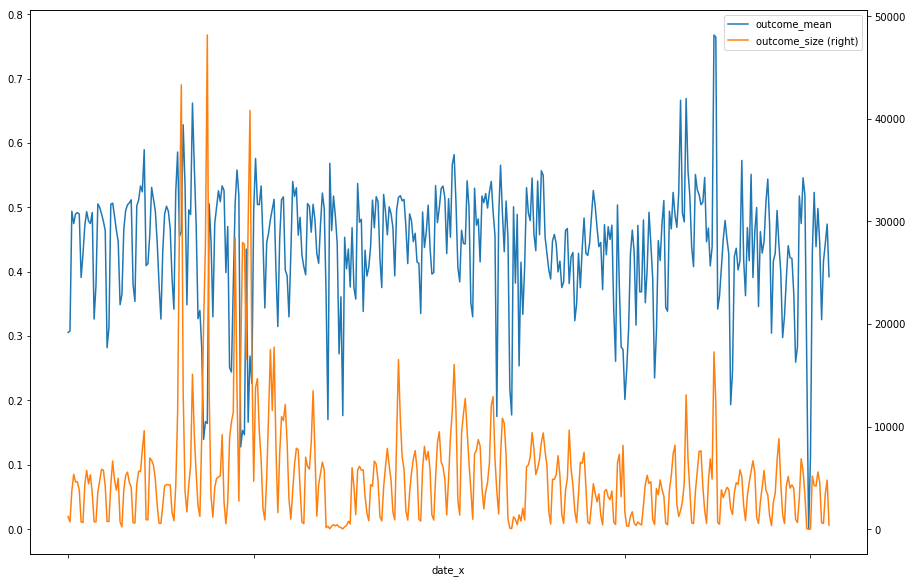

In [26]:
locator = mdates.MonthLocator()  # every month

fmt = mdates.DateFormatter('%b')

date_df=pd.DataFrame()
date_df['outcome_mean']=main_data.groupby('date_x')['outcome'].mean()
date_df['outcome_size']=main_data.groupby('date_x')['outcome'].size()

date_df.plot(secondary_y='outcome_size',figsize=(15,10))
'''X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()'''

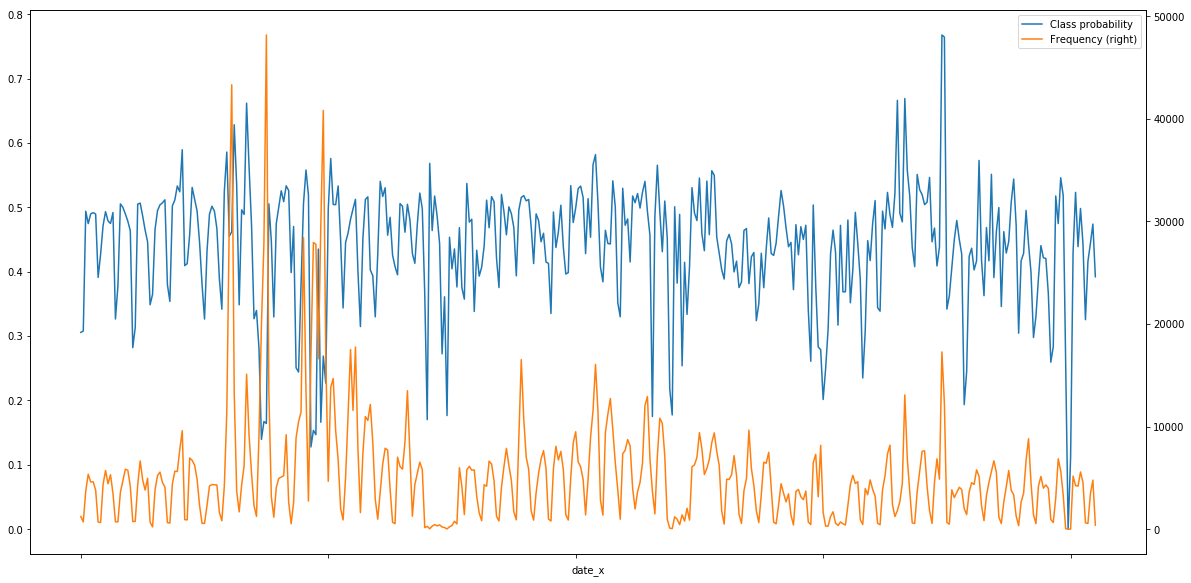

In [28]:
date_x=pd.DataFrame()
date_x['Class probability'] = main_data.groupby('date_x')['outcome'].mean()
date_x['Frequency'] = main_data.groupby('date_x')['outcome'].size()
date_x.plot(secondary_y='Frequency', figsize=(20, 10))

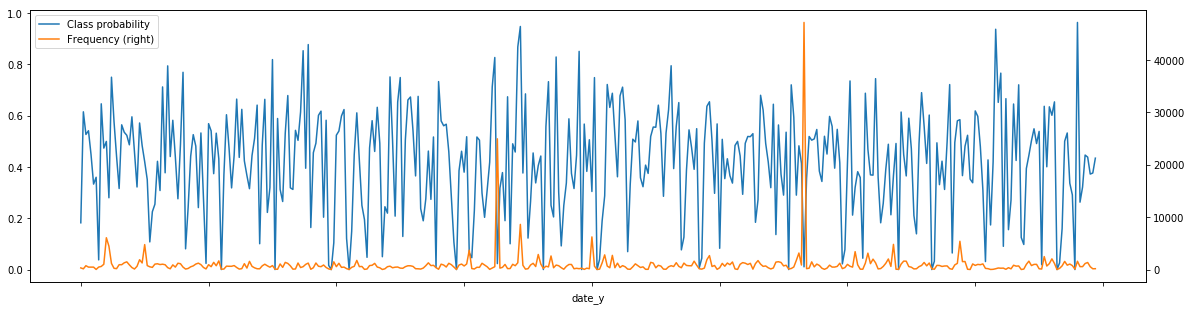

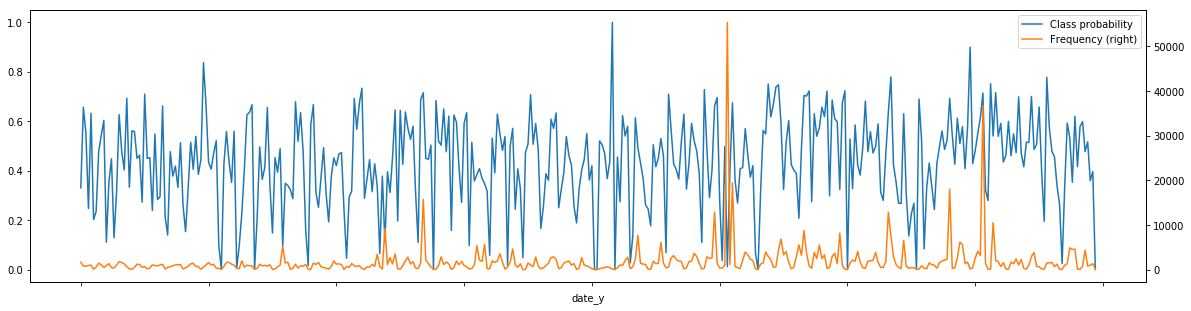

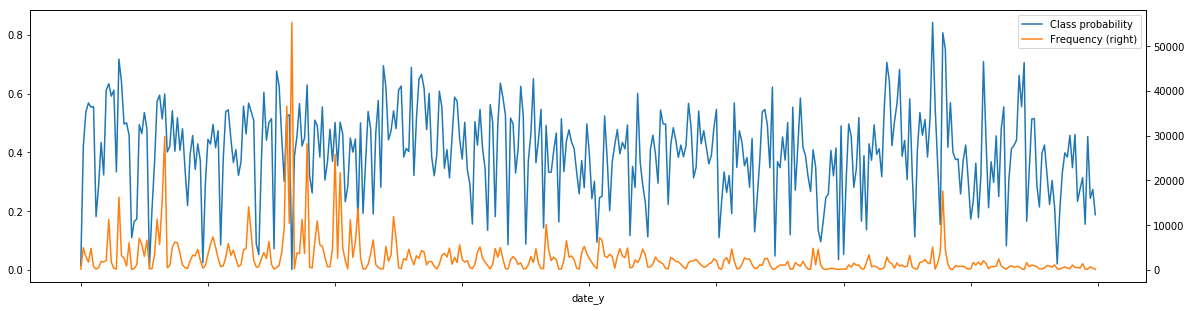

In [33]:
date_y=pd.DataFrame()
date_y['Class probability'] = main_data.groupby('date_y')['outcome'].mean()
date_y['Frequency'] = main_data.groupby('date_y')['outcome'].size()
i=int(len(date_y)/3)
date_y[0:i].plot(secondary_y='Frequency', figsize=(20, 5))
date_y[i:2*i].plot(secondary_y='Frequency', figsize=(20, 5))
date_y[2*i:].plot(secondary_y='Frequency', figsize=(20, 5))